# ✍️ Day 5 - Handwritten Digit Recognition with MNIST


In this project, we tackle a classic problem in computer vision — recognizing handwritten digits using the MNIST dataset. We’ll build a deep learning model using TensorFlow/Keras, learn about neural networks, and see how machines can "see" images just like humans do — pixel by pixel.

In [2]:
# Import Required Libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [22]:
# Load the Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Explore the Dataset
print("Training set shape:", X_train.shape)  # (60000, 28, 28)
print("Test set shape:", X_test.shape)       # (10000, 28, 28)
print("Label example:", y_train[0])

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Label example: 5


In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

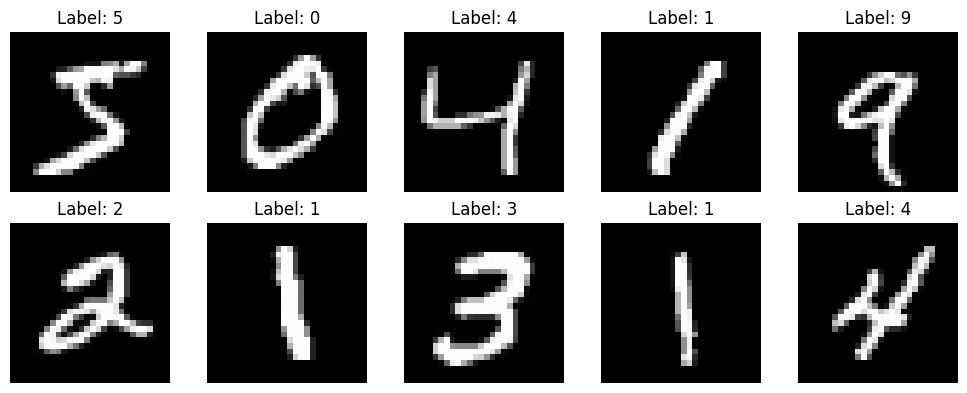

In [5]:
# Show a few example images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off') # Hides the X and Y axis ticks for a cleaner look
plt.tight_layout()  # Fits everything nicely
plt.show()

In [23]:
# Preprocess the Data

# Normalize pixel values (0–255 to 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# No need to reshape manually for Dense layers using Flatten()

# Build the Neural Network using Keras's Sequential API
model = Sequential([
    Input(shape=(28, 28)),               # Explicit input layer
    Flatten(),                           # No input_shape here
    Dense(256, activation='relu'),        # Hidden layer
    Dense(128, activation='relu'),      # Another hidden layer
    Dense(64, activation='relu'),        # Another hidden layer
    Dense(10, activation='softmax')      # Output layer for 10 classes
])

In [24]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0629 - val_accuracy: 0.9752 - val_loss: 0.0863
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0450 - val_accuracy: 0.9742 - val_loss: 0.0912
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0325 - val_accuracy: 0.9738 - val_loss: 0.0980
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9884 - loss: 0.0327 - val_accuracy: 0.9767 - val_loss: 0.0917
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0242 - val_accuracy: 0.9700 - val_loss: 0.1267
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9918 - loss: 0.0236 - val_accuracy: 0.9740 - val_loss: 0.1182
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9933 - loss: 0.0200 - val_accuracy: 0.9751 - val_loss: 0.0995
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9940 - loss: 0.0184 - 

KeyboardInterrupt: 

In [19]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9695 - loss: 0.1077
Test Accuracy: 0.9729


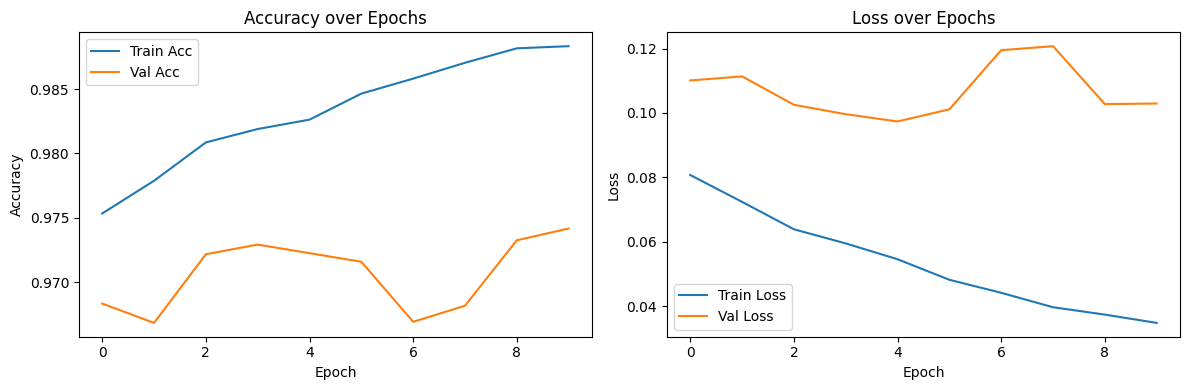

In [27]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


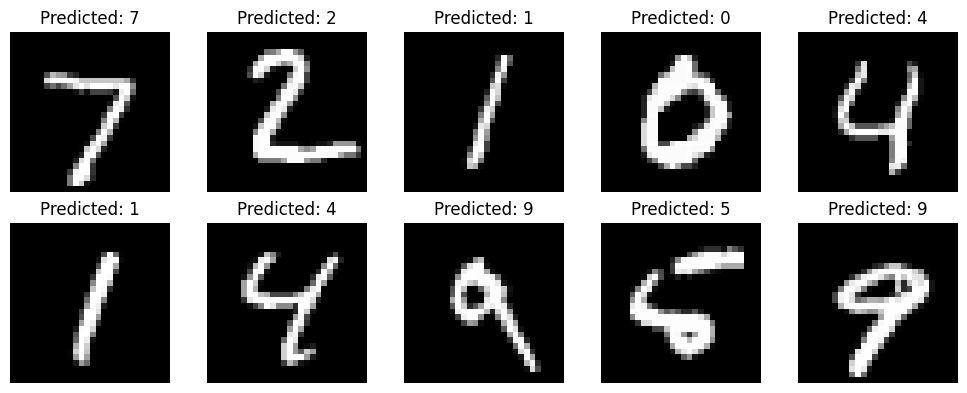

In [28]:
# Predict on Test Images
predictions = model.predict(X_test)

# View some predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()